## PART 1

Import libraries and extract tables from url using Requests and BeautifulSoup. Save each cell in a list of strings.

In [107]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

html = requests.get(url)
soup = BeautifulSoup(html.text, "html.parser")
table = soup.find_all('table')[0]
table_rows = table.find_all('tr')

cells = []
for tr in table_rows:
    td = tr.find_all('td')
    for tr in td:
        cells.append(tr.text)

Function that cleans raw string of each cell and returns a list of lists with each cell.

In [108]:
def clean_list(raw_cells):
    output = []
    for i in raw_cells:
        content = i.split('\n')[1]
        postalCode = content[:3:]
        content = content[3::]
        if content != 'Not assigned':
            splitted_content = content.split('(')
            borough = splitted_content[0]
            neighborhood_splitted = splitted_content[1][:-1:].replace('/', ', ')
            output.append([postalCode, borough, neighborhood_splitted])
    return output
        
clean_cells = clean_list(cells)

Finally, a dataframe is created using the previous list of lists.

In [109]:
df = pd.DataFrame(clean_cells)
df.columns = ["PostalCode", "Borough", "Neighborhood"]
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [110]:
df.shape

(103, 3)

## Part 2

In [111]:
import pandas as pd
url="https://cocl.us/Geospatial_data"
geo_df=pd.read_csv(url)
geo_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [112]:
merged_df = df.merge(geo_df, left_on='PostalCode', right_on='Postal Code')
merged_df = merged_df.drop(['Postal Code'], axis=1)
merged_df.tail()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
98,M8X,Etobicoke,"The Kingsway , Montgomery Road , Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East TorontoBusiness reply mail Processing Cen...,Enclave of M4L,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South , King's Mill Park , Sunnylea...",43.636258,-79.498509
102,M8Z,Etobicoke,"Mimico NW , The Queensway West , South of Bl...",43.628841,-79.520999


## Part 3

In [98]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\gh057\anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    conda-4.9.2                |   py38haa244fe_0         3.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1h             |       he774522_0         5.8 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    --------------------------------------------------

In [113]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(merged_df['Borough'].unique()),
        merged_df.shape[0]
    )
)

The dataframe has 15 boroughs and 103 neighborhoods.


In [114]:
merged_df.Neighborhood.unique()

array(['Parkwoods', 'Victoria Village', 'Regent Park ,  Harbourfront',
       'Lawrence Manor ,  Lawrence Heights',
       'Ontario Provincial Government', 'Islington Avenue',
       'Malvern ,  Rouge', 'Don Mills)Nort',
       'Parkview Hill ,  Woodbine Gardens', 'Garden District, Ryerson',
       'Glencairn',
       'West Deane Park ,  Princess Gardens ,  Martin Grove ,  Islington ,  Cloverdale',
       'Rouge Hill ,  Port Union ,  Highland Creek', 'Don Mills)Sout',
       'Woodbine Heights', 'St. James Town', 'Humewood-Cedarvale',
       'Eringate ,  Bloordale Gardens ,  Old Burnhamthorpe ,  Markland Wood',
       'Guildwood ,  Morningside ,  West Hill', 'The Beaches',
       'Berczy Park', 'Caledonia-Fairbanks', 'Woburn', 'Leaside',
       'Central Bay Street', 'Christie', 'Cedarbrae', 'Hillcrest Village',
       'Bathurst Manor ,  Wilson Heights ,  Downsview North',
       'Thorncliffe Park', 'Richmond ,  Adelaide ,  King',
       'Dufferin ,  Dovercourt Village', 'Scarborough Vil

In [115]:
import folium

# Toronto lat and lon values
latitude = 43.806686
longitude = -79.194353

map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(merged_df['Latitude'], merged_df['Longitude'], merged_df['Borough'], merged_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

We will work with boroughs that contain the word Toronto:

In [119]:
toronto_data = merged_df[merged_df['Borough'].str.contains('Toronto')].reset_index(drop=True)
toronto_data.tail()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
34,M5W,Downtown TorontoStn A PO Boxes25 The Esplanade,Enclave of M5E,43.646435,-79.374846
35,M4X,Downtown Toronto,"St. James Town , Cabbagetown",43.667967,-79.367675
36,M5X,Downtown Toronto,"First Canadian Place , Underground city",43.648429,-79.382280
37,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
38,M7Y,East TorontoBusiness reply mail Processing Cen...,Enclave of M4L,43.662744,-79.321558


### Clustering

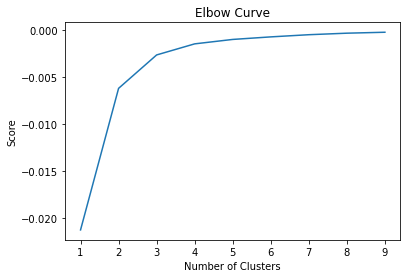

In [121]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = toronto_data[['Latitude']]
X_axis = toronto_data[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

After plotting the elbow curve, we can see that  the graph levels after 2 and 3 clusters. We will test both.

In [127]:
# Variable with the Longitude and Latitude
X=toronto_data.loc[:,['Neighborhood','Latitude','Longitude']]
X.head(10)

,Neighborhood,Latitude,Longitude
0,"Regent Park , Harbourfront",43.654260,-79.360636
1,"Garden District, Ryerson",43.657162,-79.378937
2,St. James Town,43.651494,-79.375418
3,The Beaches,43.676357,-79.293031
4,Berczy Park,43.644771,-79.373306
5,Central Bay Street,43.657952,-79.387383
6,Christie,43.669542,-79.422564
7,"Richmond , Adelaide , King",43.650571,-79.384568
8,"Dufferin , Dovercourt Village",43.669005,-79.442259
9,The Danforth East,43.685347,-79.338106


In [128]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,Neighborhood,Latitude,Longitude,cluster_label
0,"Regent Park , Harbourfront",43.654260,-79.360636,0
1,"Garden District, Ryerson",43.657162,-79.378937,0
2,St. James Town,43.651494,-79.375418,0
3,The Beaches,43.676357,-79.293031,0
4,Berczy Park,43.644771,-79.373306,0
5,Central Bay Street,43.657952,-79.387383,0
6,Christie,43.669542,-79.422564,1
7,"Richmond , Adelaide , King",43.650571,-79.384568,0
8,"Dufferin , Dovercourt Village",43.669005,-79.442259,1
9,The Danforth East,43.685347,-79.338106,0


The final number of clusters is 3. Next we will see plotted with different colours each cluster containing different neighborhood.

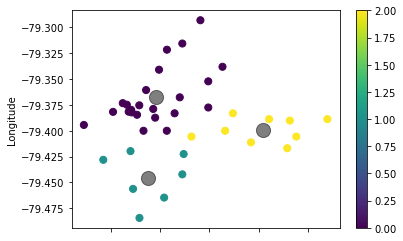

In [129]:
X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)